In [3]:
%pip install selenium


  Using cached selenium-4.29.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached trio-0.29.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached trio_websocket-0.12.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached outcome-1.3.0.post0-py2.py3-none-any.whl.metadata (2.6 kB)
Using cached selenium-4.29.0-py3-none-any.whl (9.5 MB)
Using cached trio-0.29.0-py3-none-any.whl (492 kB)
Using cached trio_websocket-0.12.2-py3-none-any.whl (21 kB)
Using cached attrs-25.3.0-py3-none-any.whl (63 kB)
Using cached outcome-1.3.0.post0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0



[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Rejeter
Se connecter


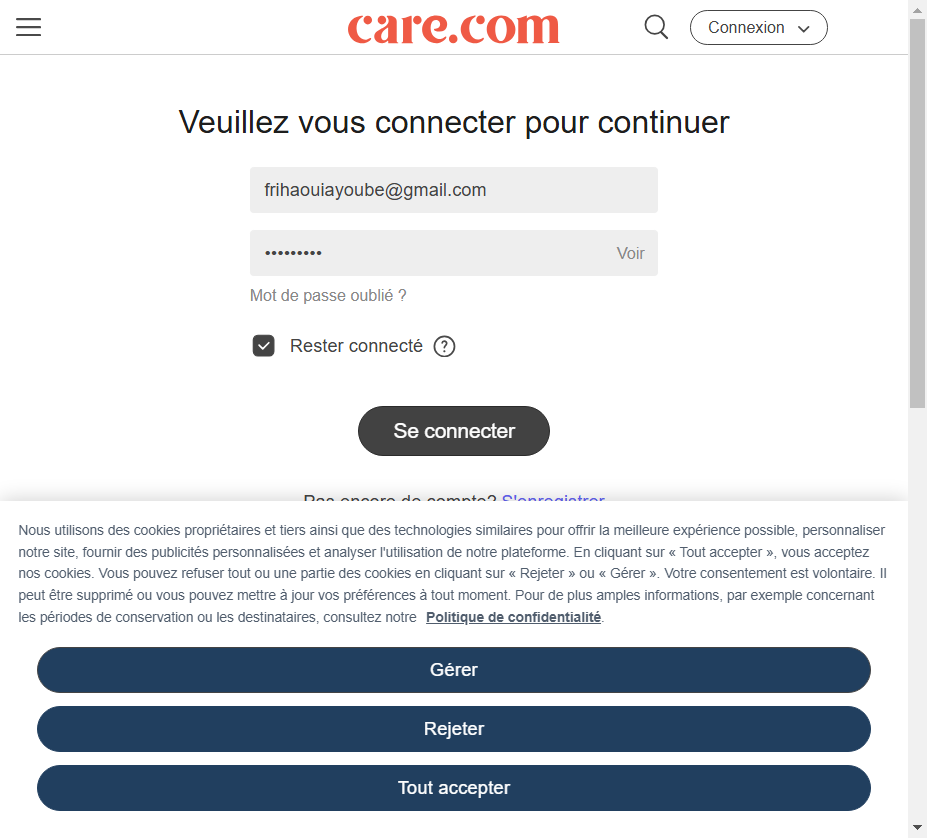

{'level': 'SEVERE', 'message': 'https://www.partner-betreut.de/go.cgi?target=%2Ffr-fr%2Flogin - Failed to load resource: net::ERR_CERT_COMMON_NAME_INVALID', 'source': 'network', 'timestamp': 1742301875953}
{'level': 'WARNING', 'message': 'https://www.care.com/fr-fr/login - <meta name="apple-mobile-web-app-capable" content="yes"> is deprecated. Please include <meta name="mobile-web-app-capable" content="yes">', 'source': 'other', 'timestamp': 1742301876162}


TimeoutException: Message: 


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up headless Chrome options
chrome_options = Options()
#chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")

# Initialize the driver (make sure you have the correct chromedriver installed)
driver = webdriver.Chrome(options=chrome_options)

try:
    # Navigate to the login page
    driver.get("https://www.care.com/fr-fr/login")
    
    # Wait until the email input is present (adjust the timeout as needed)
    wait = WebDriverWait(driver, 10)
    # Execute JavaScript to remove the overlay element
    driver.execute_script("document.querySelector('.onetrust-pc-dark-filter').remove();")
    email_input = wait.until(EC.presence_of_element_located((By.ID, "j_username")))
    password_input = driver.find_element(By.ID, "j_password")
    
    # Enter your credentials (replace with your actual credentials or fetch from secure storage)
    email_input.send_keys("frihaouiayoube@gmail.com")
    password_input.send_keys("07vk640xz")
    
    reject = driver.find_element(By.ID, "onetrust-reject-all-handler")
    if reject:
        print(reject.text)
        reject.click()
    else:
        print("reject not found")
    wait = WebDriverWait(driver, 10)
    
    # Submit the form (you might need to click the login button)
    login_button = driver.find_element(By.ID, "32641-login-btn")
    print(login_button.text)
    login_button.click()
    
    wait = WebDriverWait(driver, 10)
    # Take a screenshot and save it
    driver.save_screenshot("debug.png")

    # Display the screenshot in the notebook
    from IPython.display import Image, display
    display(Image("debug.png"))
    for entry in driver.get_log("browser"):
        print(entry)
    
    # Wait for some element on the post-login page or check URL change to ensure login success
    wait.until(EC.url_contains("/my-account"))  # adjust as per the expected URL
    dashboard_element = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, ".inboxIcon icon")))
    
    # Extract cookies
    cookies = driver.get_cookies()
    print("Cookies:", cookies)
    
    # (Optional) Save cookies to a config file or other storage
    # with open('config.py', 'w') as f:
    #     f.write("COOKIES = " + repr(cookies))
    
finally:
    driver.quit()
